## Imporing

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import StandardScaler


## Load DF

In [8]:
df = pd.read_csv('dog_horse.csv')

df.tail()


,Unnamed: 0,height,weight,target,type
195,195,55.0,140.0,1.0,horse
196,196,82.0,179.0,1.0,horse
197,197,46.0,132.0,1.0,horse
198,198,56.0,89.0,1.0,horse
199,199,58.0,98.0,1.0,horse


## Handling & EDA

In [9]:
df=df.drop(['Unnamed: 0'],axis=1)  #drop 1st column which is unwanted

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  200 non-null    float64
 1   weight  200 non-null    float64
 2   target  200 non-null    float64
 3   type    200 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


In [75]:
df.shape

(200, 4)

<AxesSubplot:xlabel='height', ylabel='weight'>

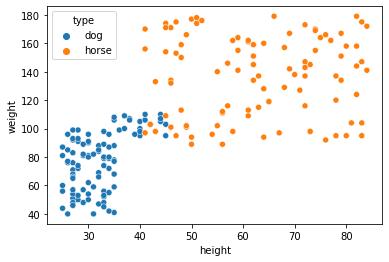

In [76]:
sns.scatterplot(data = df, x = 'height', y='weight',hue='type')

## Spilt DF


In [52]:

X = df[['height','weight']]
y = df[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.37)

In [53]:
# Baseline 
y_train.target.value_counts(normalize=True)

0.0    0.531746
1.0    0.468254
Name: target, dtype: float64

## Create Decision Tree Model

In [86]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [87]:
#precision, recall, and accuracy of training
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        67
         1.0       1.00      0.98      0.99        59

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



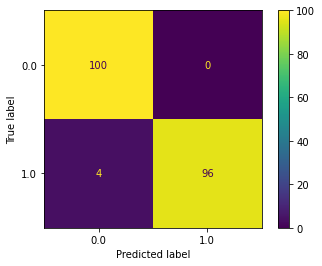

In [88]:
plot_confusion_matrix(model, X, y);

## test result

In [89]:
#precision, recall, and accuracy of test
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        33
         1.0       1.00      0.93      0.96        41

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



## Tree Plot

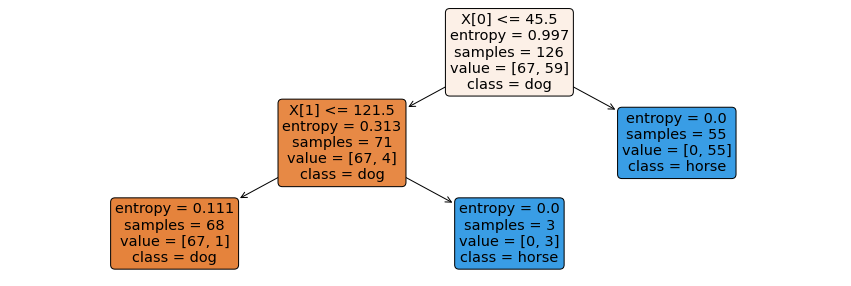

In [94]:
plt.figure(figsize=(15,5))

tree.plot_tree(
    model, 
    filled=True,
    rounded=True,
    class_names=df.type.unique() 
);